# 1. Behavioral data checks:

Getting descriptive stats for the normative ratings for vidoes in df_set1.


This is for the manuscript "Wang. Y., Kragel, P.A., Satpute, A.B. (preprint) Neural predictors of subjective fear depend on the situation. 2022"

*Yiyu Wang 2022/09*

In [ ]:
import os
import glob
import nibabel as nib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_dir = '/work/abslab/Yiyu/AffVids/'
# set up directories
behavdata_dir =  base_dir +'BehavData/'
category = ['Heights','Social','Spider']

In [3]:
raw_df = pd.read_csv(behavdata_dir + 'video_df_set1.csv')
raw_df

,video_cats,video_intense,video_num,Subject,how_aroused,how_fearful,how_pleasant,how_present_distant
0,Heights,High,1,R_02hovykUguDYNvX,7,7,2,7
1,Heights,High,1,R_07LWbSNN2LeacH7,4,3,3,6
2,Heights,High,1,R_0D3jz5vAZzHLlRf,7,7,1,7
3,Heights,High,1,R_0U7Lx46Ea7gH93H,6,7,1,6
4,Heights,High,1,R_10PMBlLxTrAn3La,6,5,2,5
...,...,...,...,...,...,...,...,...
7267,Spider,Low,36,R_xEoU0dv89ZMyPsJ,5,2,3,5
7268,Spider,Low,36,R_XG3Wqt7gORf1m0N,6,1,5,2
7269,Spider,Low,36,R_z07IhJqI66Lr2Pn,1,4,1,4
7270,Spider,Low,36,R_ZahwvNyDxFOJ5AJ,5,2,5,5


In [4]:
n_sub = len(np.unique(raw_df.Subject))

In [18]:
raw_df = pd.read_csv(behavdata_dir + 'video_df_set1.csv')
raw_df['how_fearful'] = raw_df['how_fearful'].apply(lambda x: (x - 1)/6)
group_df = raw_df.groupby('video_num').mean()
fear = group_df['how_fearful']
group_df = raw_df.groupby('video_num').std()
fear_std =group_df['how_fearful']
df = pd.DataFrame({
    'fear':fear,
    'fear_std':fear_std
})
df.reset_index(inplace=True)


# Heights:

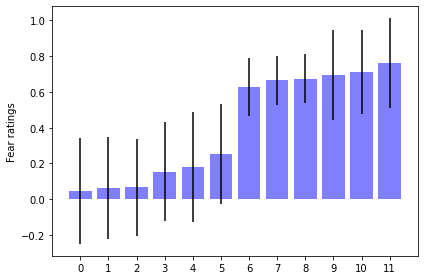

max fear rating: 0.7640264026402638
min fear rating: 0.043729372937293724
mean fear rating: 0.40882838283828377
sem fear rating: 0.2879247347751188


In [19]:
plot_df = df[df['video_num']<13]

fear_ratings = np.sort(plot_df.fear)
error = plot_df.fear_std
x_pos = np.arange(len(fear_ratings))

fig, ax = plt.subplots()
ax.bar(x_pos,fear_ratings, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=0, color='b')
ax.set_ylabel('Fear ratings')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.yaxis.grid(False)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()


print(f'max fear rating: {max(fear_ratings)}')
print(f'min fear rating: {min(fear_ratings)}')
print(f'mean fear rating: {np.mean(fear_ratings)}')
print(f'sem fear rating: {np.std(fear_ratings)}')

In [20]:
fear_ratings = raw_df[raw_df['video_num']<13]['how_fearful']
print(f'max fear rating: {max(fear_ratings)}')
print(f'min fear rating: {min(fear_ratings)}')
print(f'mean fear rating: {np.mean(fear_ratings)}')
print(f'sem fear rating: {np.std(fear_ratings)}')

max fear rating: 1.0
min fear rating: 0.0
mean fear rating: 0.4088283828382838
sem fear rating: 0.3798147487589608


# Social

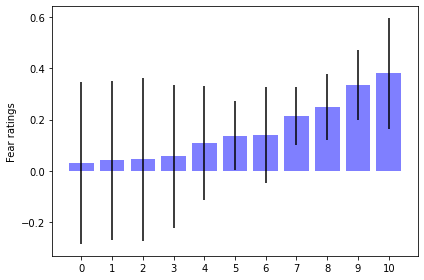

max fear rating: 0.37953795379537947
min fear rating: 0.030528052805280533
mean fear rating: 0.15759075907590755
sem fear rating: 0.11575453420253808


In [21]:
plot_df = df[(df['video_num']>13) & (df['video_num']<25)]

fear_ratings = np.sort(plot_df.fear)
error = plot_df.fear_std
x_pos = np.arange(len(fear_ratings))

fig, ax = plt.subplots()
ax.bar(x_pos,fear_ratings, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=0, color='b')
ax.set_ylabel('Fear ratings')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.yaxis.grid(False)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

print(f'max fear rating: {max(fear_ratings)}')
print(f'min fear rating: {min(fear_ratings)}')
print(f'mean fear rating: {np.mean(fear_ratings)}')
print(f'sem fear rating: {np.std(fear_ratings)}')

In [22]:
fear_ratings = raw_df[(raw_df['video_num']>13) & (raw_df['video_num']<25)]['how_fearful']
print(f'max fear rating: {max(fear_ratings)}')
print(f'min fear rating: {min(fear_ratings)}')
print(f'mean fear rating: {np.mean(fear_ratings)}')
print(f'sem fear rating: {np.std(fear_ratings)}')

max fear rating: 1.0
min fear rating: 0.0
mean fear rating: 0.1575907590759076
sem fear rating: 0.2555125531262493


# Spiders:

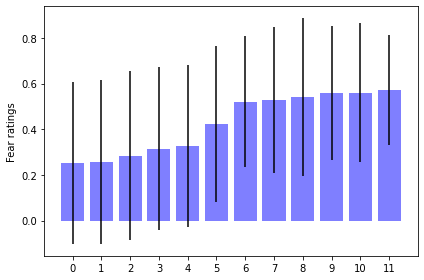

max fear rating: 0.5709570957095708
min fear rating: 0.2516501650165016
mean fear rating: 0.4284928492849285
sem fear rating: 0.126002973193426


In [23]:
plot_df = df[df['video_num']>24]

fear_ratings = np.sort(plot_df.fear)
error = plot_df.fear_std
x_pos = np.arange(len(fear_ratings))

fig, ax = plt.subplots()
ax.bar(x_pos,fear_ratings, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=0, color='b')
ax.set_ylabel('Fear ratings')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.yaxis.grid(False)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

print(f'max fear rating: {max(fear_ratings)}')
print(f'min fear rating: {min(fear_ratings)}')
print(f'mean fear rating: {np.mean(fear_ratings)}')
print(f'sem fear rating: {np.std(fear_ratings)}')

In [24]:
fear_ratings = raw_df[raw_df['video_num']>24]['how_fearful']
print(f'max fear rating: {max(fear_ratings)}')
print(f'min fear rating: {min(fear_ratings)}')
print(f'mean fear rating: {np.mean(fear_ratings)}')
print(f'sem fear rating: {np.std(fear_ratings)}')

max fear rating: 1.0
min fear rating: 0.0
mean fear rating: 0.4284928492849284
sem fear rating: 0.3521861140028503
